<a href="https://colab.research.google.com/github/Sbu97/AI_in_built_environments_sbusiso_IAAC2024_tutorials_/blob/main/quickstarts/02_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/quickstarts/02_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

In [1]:
!pip install osmnx geopy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 1.8 MB/s eta 0:00:00


In [2]:
import geopandas
import matplotlib.pyplot as plt
import osmnx
import seaborn as sns
from shapely.geometry import Point, LineString

sns.set_style(style="dark")

### 🕸 Street network

In [18]:
PLACE_NAME = "les corts, Barcelona, Spain"
graph = osmnx.graph_from_place(PLACE_NAME)

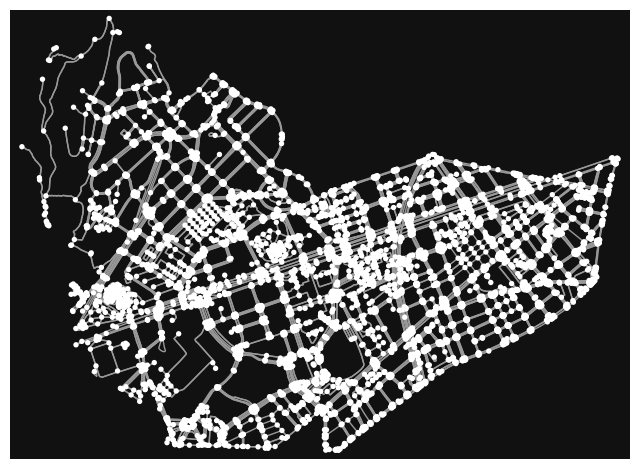

In [19]:
# showing our street network

figure, ax = osmnx.plot_graph(graph)

### 🕍 Building footprints

We can retrieve places information as well (buildings, parks, amenities etc). The data that we retrieve is a dataframe, like the ones we worked with during the previous term:

In [20]:
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True},
)

buildings.head()

<ipython-input-20-25295188f309>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = osmnx.geometries_from_place(


name  ref  \
element_type osmid                                               
node         2629932730                      NH Les Corts  NaN   
             5372082832                  Churrería Montse  NaN   
             8265818805                          Rocòdrom  NaN   
way          35814815    Facultat de Ciències de la Terra  NaN   
             36335613               Geociencies Barcelona  NaN   

                                                                  geometry  \
element_type osmid                                                           
node         2629932730                           POINT (2.13657 41.38750)   
             5372082832                           POINT (2.13385 41.38460)   
             8265818805                           POINT (2.12815 41.38467)   
way          35814815    POLYGON ((2.11888 41.38431, 2.11969 41.38451, ...   
             36335613    POLYGON ((2.11888 41.38443, 2.11918 41.38451, ...   

                        addr:housenumber                         addr:street  \
element_type osmid                                                             
node         2629932730              292             Travessera de les Corts   
             5372082832              NaN                                 NaN   
             8265818805               33  Carrer de Dolors Masferrer i Bosch   
way          35814815                NaN          Carrer de Martí i Franquès   
             36335613                NaN      Carrer de Lluís Solé i Sabarís   

                         addr:city addr:country addr:postcode     branch  \
element_type osmid                                                         
node         2629932730  Barcelona           ES         08029  Les Corts   
             5372082832        NaN          NaN           NaN        NaN   
             8265818805  BARCELONA          NaN         08028        NaN   
way          35814815    Barcelona          NaN           NaN        NaN   
             36335613    Barcelona          NaN         08028        NaN   

                           building  ... short_name  fax alt_name:ca  bar  \
element_type osmid                   ...                                    
node         2629932730         yes  ...        NaN  NaN         NaN  NaN   
             5372082832       kiosk  ...        NaN  NaN         NaN  NaN   
             8265818805      public  ...        NaN  NaN         NaN  NaN   
way          35814815           yes  ...        NaN  NaN         NaN  NaN   
             36335613    university  ...        NaN  NaN         NaN  NaN   

                        payment:credit_cards payment:debit_cards reservation  \
element_type osmid                                                             
node         2629932730                  NaN                 NaN         NaN   
             5372082832                  NaN                 NaN         NaN   
             8265818805                  NaN                 NaN         NaN   
way          35814815                    NaN                 NaN         NaN   
             36335613                    NaN                 NaN         NaN   

                        not:name brand:wikipedia payment:cash  
element_type osmid                                             
node         2629932730      NaN             NaN          NaN  
             5372082832      NaN             NaN          NaN  
             8265818805      NaN             NaN          NaN  
way          35814815        NaN             NaN          NaN  
             36335613        NaN             NaN          NaN  

[5 rows x 142 columns]

<Axes: >

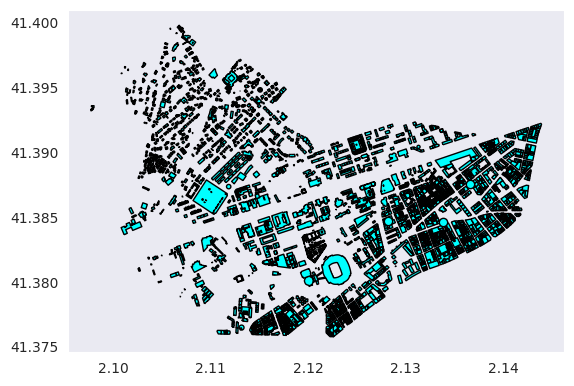

In [30]:
buildings.plot(color="cyan", edgecolor="black")

### 🍽 Other data extraction

There is a lot more data that can be extracted, like parks, amenities and more! See the entire list [here](https://wiki.openstreetmap.org/wiki/Map_features).

In [32]:
college = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "college"
    }
)
college.head()

<ipython-input-32-1c2ad9d622bb>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  college = osmnx.geometries_from_place(


addr:housenumber                addr:street  amenity  \
element_type osmid                                                              
node         6236811361               491          Avinguda Diagonal  college   
             10108728701               11           Carrer de Berlín  college   
way          761059106                 20  Carrer de Mejía Lequerica  college   

                                             name  \
element_type osmid                                  
node         6236811361       Fomento Profesional   
             10108728701  CIM Formación Barcelona   
way          761059106              Pavelló Xaloc   

                                                                   geometry  \
element_type osmid                                                            
node         6236811361                            POINT (2.14335 41.39204)   
             10108728701                           POINT (2.13701 41.38249)   
way          761059106    POLYGON ((2.12558 41.38325, 2.12554 41.38331, ...   

                          addr:city addr:postcode internet_access  \
element_type osmid                                                  
node         6236811361         NaN           NaN             NaN   
             10108728701  Barcelona         08014             yes   
way          761059106    Barcelona         08022             yes   

                         internet_access:fee                 name:ca  \
element_type osmid                                                     
node         6236811361                  NaN                     NaN   
             10108728701                  no  CIM Formació Barcelona   
way          761059106             customers           Pavelló Xaloc   

                                phone  \
element_type osmid                      
node         6236811361           NaN   
             10108728701  934 510 909   
way          761059106            NaN   

                                                                    website  \
element_type osmid                                                            
node         6236811361                                                 NaN   
             10108728701   https://www.cimformacion.com/centros/barcelona/3   
way          761059106    https://www.diba.cat/web/recintes/maternitat/p...   

                         wheelchair  \
element_type osmid                    
node         6236811361         NaN   
             10108728701        yes   
way          761059106          yes   

                                                                      nodes  \
element_type osmid                                                            
node         6236811361                                                 NaN   
             10108728701                                                NaN   
way          761059106    [7110443484, 7110443454, 7110569087, 158673119...   

                         building  \
element_type osmid                  
node         6236811361       NaN   
             10108728701      NaN   
way          761059106        yes   

                                                                      image  \
element_type osmid                                                            
node         6236811361                                                 NaN   
             10108728701                                                NaN   
way          761059106    https://www.diba.cat/documents/99363101/365038...   

                                        operator operator:type  
element_type osmid                                              
node         6236811361                      NaN           NaN  
             10108728701                     NaN           NaN  
way          761059106    Diputació de Barcelona        public

### 🎢 Putting it all together in one map

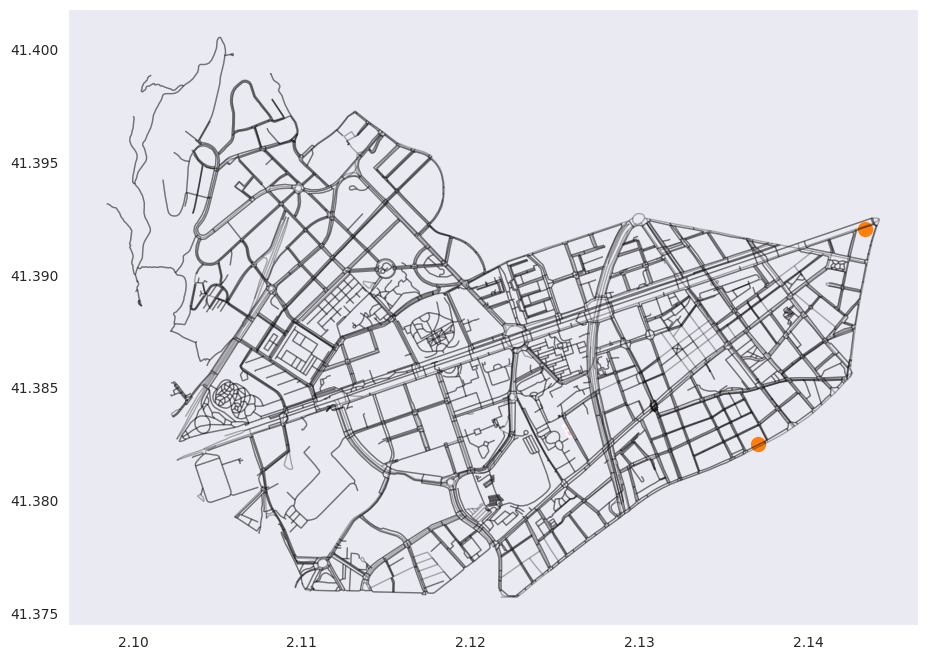

In [35]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
college.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
college.plot(ax=ax, facecolor="pink", markersize=100)

plt.show()

### 📍Mapping our own place

There are several ways to map our place on the map:

1. placing a point when we know the exact coordinates
2. finding place's coordinates via [geocoding](https://nominatim.org/)

#### 📍Placing a point by its coordinates

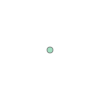

In [36]:
coords = (2.13615,41.38193)
p = Point(coords)
p

In [37]:
print(p.x, p.y)

2.13615 41.38193


In [38]:
geom = geopandas.GeoDataFrame(
    {
        "geometry": [p],
    },
    crs=edges.crs
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


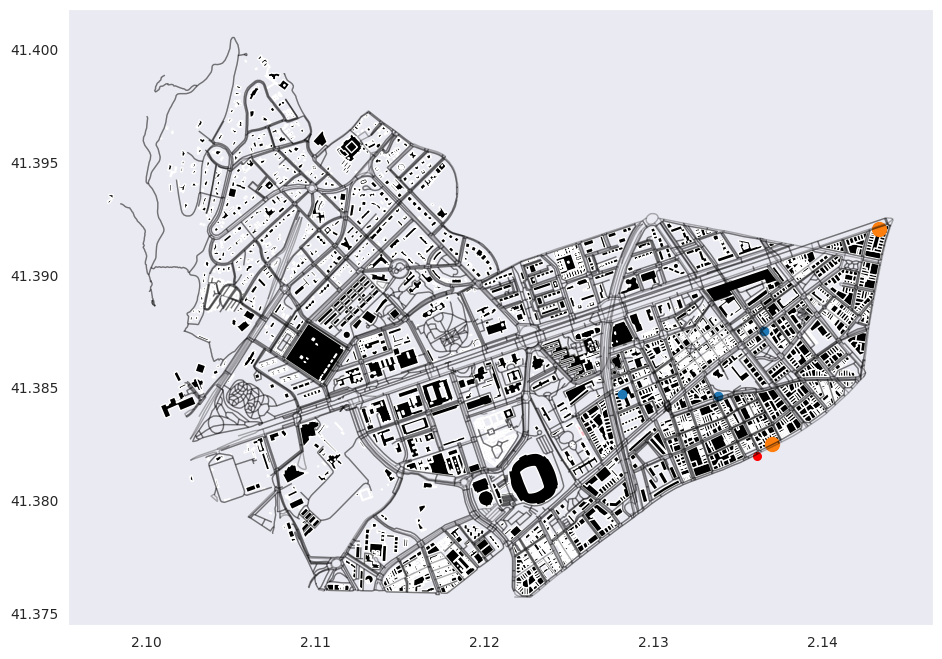

In [39]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
college.plot(ax=ax, facecolor="pink", markersize=100)

# Plot IAAC
geom.plot(ax=ax, facecolor="red", markersize=30)


plt.show()

#### ㊙️ Geocoding: name to coordinates

In [ ]:
our_place = "Casino l'Aliança del Poblenou"  # "Institute for Advanced Architecture of Catalonia"
geocoded_addresses = geopandas.tools.geocode(
    [our_place],
    provider="nominatim",
    user_agent="autogis2023",
    timeout=10
)
geocoded_addresses.head()

geometry                                            address
0  POINT (2.20336 41.39986)  Casino l'Aliança del Poblenou, Rambla del Pobl...

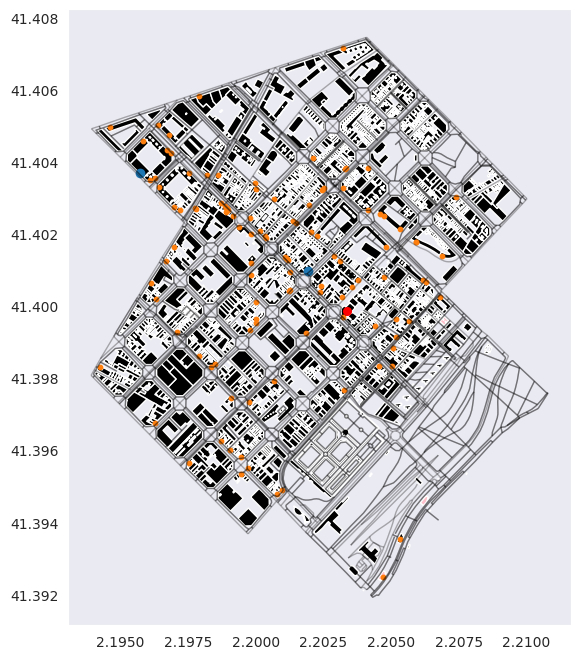

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=30)


plt.show()

### 📐 Geometrical operations

A list of possible geometrical operations can be found in [shapely documentation](https://shapely.readthedocs.io/en/stable/geometry.html).

Let's check how many restaurants lie within 4 minutes fast walk (0.5 km). 1km is around 0.008 degrees

In [ ]:
rad = p.buffer(0.008 * 0.5)  # making offset of 1.5 km from our point of interest

rad = geopandas.GeoDataFrame(
    {
        "geometry": [rad],
    },
    crs=buildings.crs
)

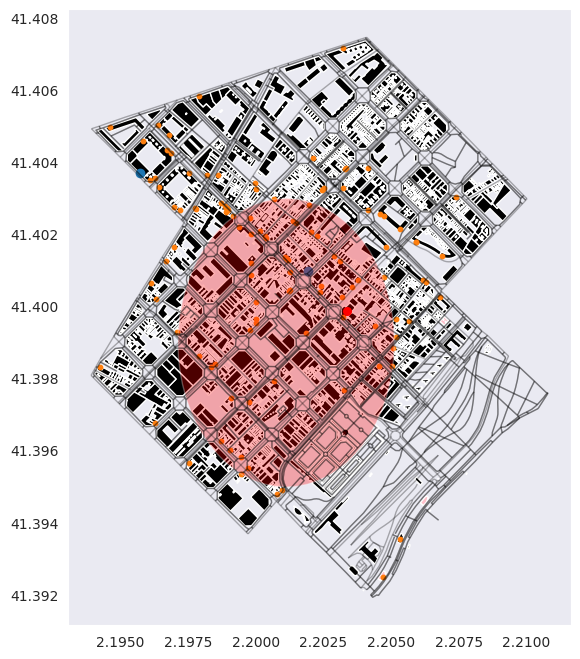

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=30)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

plt.show()

In [ ]:
accessible_restaurants = [r for r in restaurants["geometry"] if isinstance(r, Point) and r.within(rad["geometry"][0])]
accessible_restaurants = rad = geopandas.GeoDataFrame(
    {
        "geometry": accessible_restaurants,
    },
    crs=buildings.crs
)

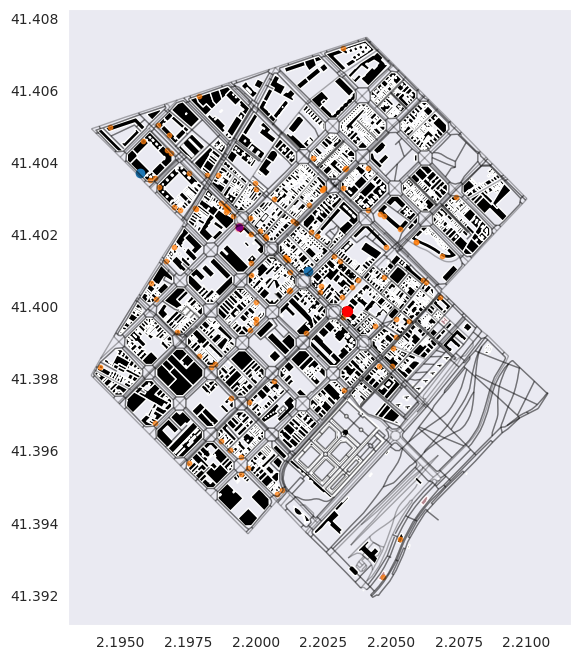

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10, alpha=0.7)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=50)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

accessible_restaurants.plot(ax=ax, facecolor="purple", markersize=20, alpha=1.0)

plt.show()

### 🕸 Network Analysis

With osmnx we can get statistics necessary for urban analysis within a defined area. Let's define our area as a polygon:

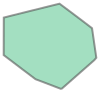

In [ ]:
zone = edges.unary_union.convex_hull
zone

In [ ]:
stats = osmnx.basic_stats(graph, area=zone.area)
stats

{'n': 1907,
 'm': 5413,
 'k_avg': 5.67697954902989,
 'edge_length_total': 160919.76599999916,
 'edge_length_avg': 29.728388324404058,
 'streets_per_node_avg': 3.40534871525957,
 'streets_per_node_counts': {0: 0, 1: 44, 2: 2, 3: 1009, 4: 841, 5: 11},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.023072889355007866,
  2: 0.001048767697954903,
  3: 0.5291033036182485,
  4: 0.4410068169900367,
  5: 0.0057682223387519665},
 'intersection_count': 1863,
 'street_length_total': 95690.108,
 'street_segment_count': 3176,
 'street_length_avg': 30.129127204030226,
 'circuity_avg': 1.030140938475798,
 'self_loop_proportion': 0.001889168765743073,
 'node_density_km': 10249958297341.55,
 'intersection_density_km': 10013462143653.543,
 'edge_density_km': 864929675258496.1,
 'street_density_km': 514325965636134.75}

What do these stats mean?

[Link](https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.stats)

#### 〽️ Shortest route

In [ ]:
origin = (
    osmnx.geocode_to_gdf("Institute for Advanced Architecture of Catalonia")  # fetch geolocation
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
)

destination = (
    osmnx.geocode_to_gdf("Jardins de l'Arenal de Llevant")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

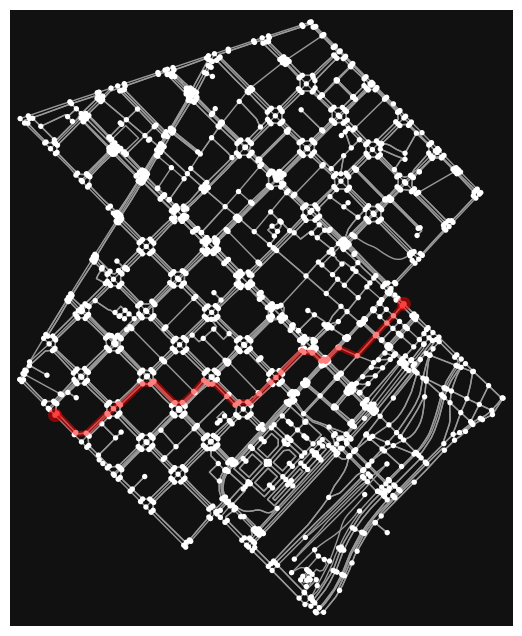

In [ ]:
origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)

# calculating the shortest path:
route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)

# plotting the projection
fig, ax = osmnx.plot_graph_route(graph, route)

In [ ]:
route_nodes = nodes.loc[route]
route_line = LineString(
    list(route_nodes.geometry.values)
)
route_geom = geopandas.GeoDataFrame(
    {
        "geometry": [route_line],
        "osm_nodes": [route],
    },
    crs=edges.crs
)

# Calculate the route length
route_geom.length

/tmp/ipykernel_2205/3375068879.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  route_geom.length


0    0.01473
dtype: float64

### 🕸 Walkability analysis

How far can you reach from a place on foot?

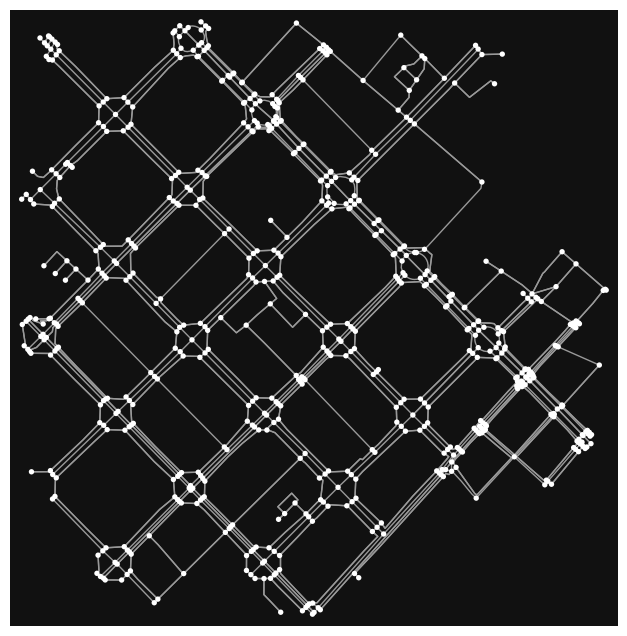

In [ ]:
# getting iaac node from the graph:
iaac_node = osmnx.distance.nearest_nodes(graph, p.x, p.y, return_dist=False)

# cutting the graph to hold 1km distance from the node only:
g = osmnx.truncate.truncate_graph_dist(graph, iaac_node, max_dist=500)
figure, ax = osmnx.plot_graph(g)


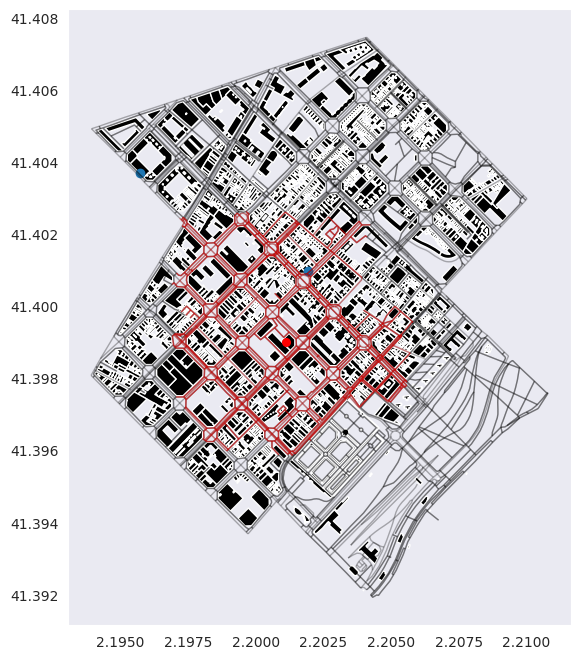

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)
plt.show()

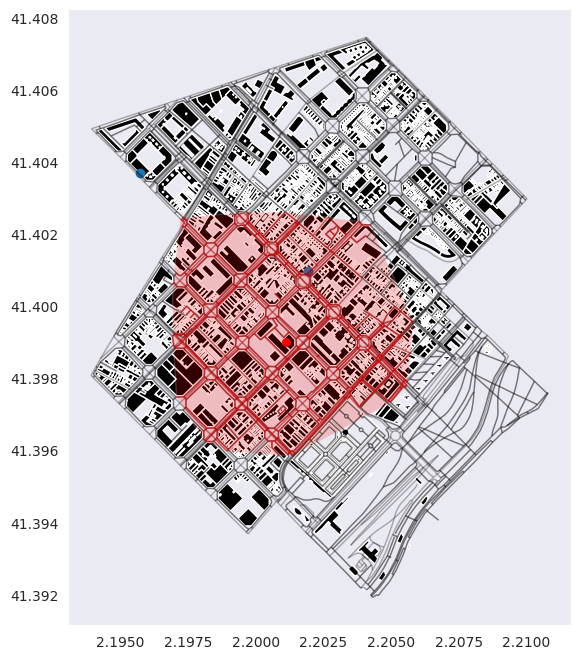

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)

walkable_zone = edges1.unary_union.convex_hull

w_zone_mapped = geopandas.GeoDataFrame(
    {
        "geometry": [walkable_zone],
    },
    crs=buildings.crs
)

w_zone_mapped.plot(ax=ax, facecolor="red", alpha=0.2)


plt.show()

### 🧬 Resources

* [Downloading data for entire countries / continents](https://download.geofabrik.de/)
* [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html)
* [OSMNX](https://osmnx.readthedocs.io/en/stable/user-reference.html)
* [shapely](https://shapely.readthedocs.io/en/stable/geometry.html)

This notebook is based on the material from [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html) from [University of Helsinki](https://www.helsinki.fi/sv) by Henrikki Tenkanen, Vuokko Heikinheimo and Håvard Wallin Aagesen.

Materials taken from the course belong mostly to the [Lesson 3 Geocoding](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/geocoding.html) and [Lesson 6 Retrieving data from OSM and Network Analysis](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-6/overview.html). Material was adapted for the purposes of this course by changing the location in the example as well as adding calculation of walking distance from a given point.


Thanks to them for maintaining [the course repo](https://github.com/Automating-GIS-processes/site/) and improving the material from year to year.